In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats  
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, ShuffleSplit, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.dummy import DummyRegressor

In [82]:
data = pd.read_csv("data/kc_house_data.csv")
data.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
irrelevant_columns = ['date',
'view',
'sqft_above',
'sqft_basement',
'yr_renovated',
'zipcode',
'lat',
'long',
'sqft_living15',
'sqft_lot15']

In [4]:
df=data.drop(irrelevant_columns, axis=1).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


In [5]:
df.isna().sum()

id                0
price             0
bedrooms          0
bathrooms         0
sqft_living       0
sqft_lot          0
floors            0
waterfront     2376
condition         0
grade             0
yr_built          0
dtype: int64

In [6]:
df.waterfront.fillna(value=0, inplace = True)
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
floors         0
waterfront     0
condition      0
grade          0
yr_built       0
dtype: int64

In [7]:
df=df.drop(df[df['bedrooms']==33].index).copy()
df=df.drop('id', axis=1).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21596 non-null  float64
 1   bedrooms     21596 non-null  int64  
 2   bathrooms    21596 non-null  float64
 3   sqft_living  21596 non-null  int64  
 4   sqft_lot     21596 non-null  int64  
 5   floors       21596 non-null  float64
 6   waterfront   21596 non-null  float64
 7   condition    21596 non-null  int64  
 8   grade        21596 non-null  int64  
 9   yr_built     21596 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.8 MB


<AxesSubplot:>

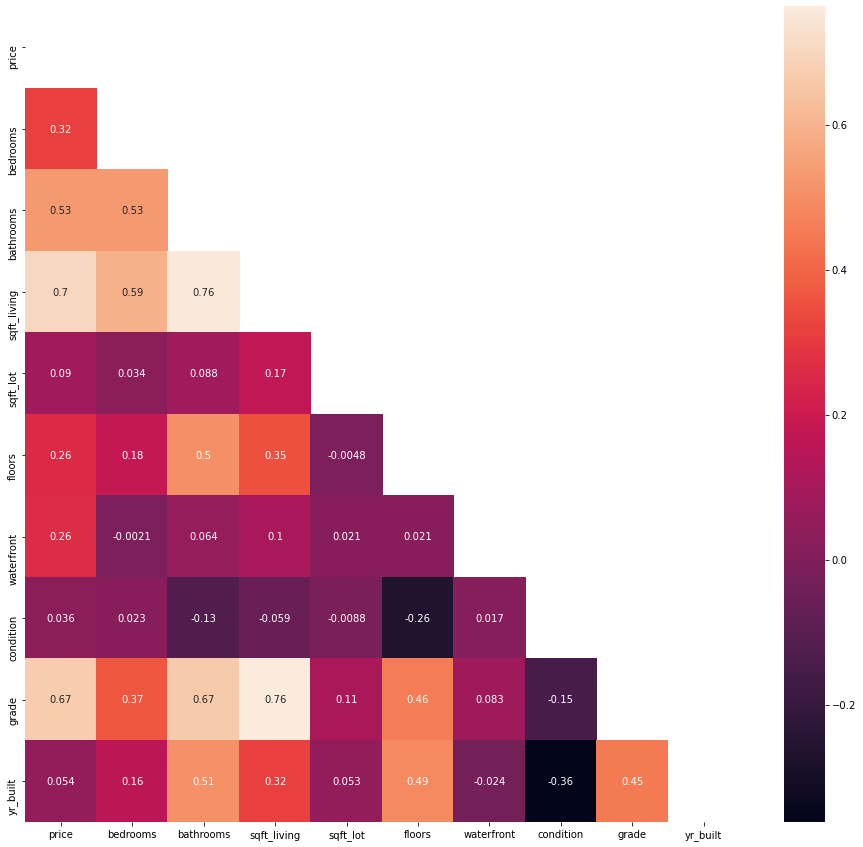

In [8]:
corr= df.corr()
fig, axes = plt.subplots( figsize=(16,15))

sns.heatmap(data=corr, mask=np.triu(np.ones_like(corr, dtype = bool)), annot=True)

In [9]:

x=df.drop('price', axis=1).copy()
y=df['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# #testing for VIF
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# vif = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
# pd.Series(vif, index=x.columns, name="Variance Inflation Factor")   

In [88]:
#seperating two types of predictors 

# categorical=['bedrooms','bathrooms','floors', 'waterfront', 'condition', 'grade']
# # categorical=['grade', 'bathrooms', 'bedrooms']
# con = ['sqft_living','sqft_lot']

In [89]:
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(x_train_final, y_train_scaled)
DummyRegressor()
dummy_regr.predict(x_train_final)
dummy_regr.score(x_train_final, y_train_scaled)

0.0

In [90]:
outcome = 'price'
predictors = x_train_final
formula = outcome + '~' + "+".join(predictors.columns)
model = smf.ols(formula=formula, data=train_final).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     581.1
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:38:29   Log-Likelihood:                -14952.
No. Observations:               17276   AIC:                         3.003e+04
Df Residuals:                   17215   BIC:                         3.050e+04
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       6.267e+07    2.6e+10      0.002      0.998   -5.09e+10     5.1e+10
sqft_living       -0.1055      0.005    -19.909      0.000      -0.116      -0.095
sqft_lot           0.4262      0.010     42.591      0.000       0.407       0.446
bedrooms_1     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_2     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_3     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_4     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_5     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_6     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_7     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_8     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_9     -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_10    -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bedrooms_11    -2.355e+05   9.77e+07     -0.002      0.998   -1.92e+08    1.91e+08
bathrooms_0_5   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_0_75  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_1_0   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_1_25  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_1_5   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_1_75  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_2_0   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_2_25  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_2_5   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_2_75  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_3_0   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_3_25  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_3_5   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_3_75  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_4_0   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_4_25  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_4_5   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_4_75  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_5_0   2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_5_25  2.268e+06   9.41e+08      0.002      0.998   -1.84e+09    1.85e+09
bathrooms_5_

JESUS CODE

In [91]:
sqft_living = x_train['sqft_living']
log_grade = np.log(x_train['grade'])
log_bathrooms = np.log(x_train['bathrooms'])
log_bedrooms = np.log(x_train['bedrooms'])

#continuous
scaled_sqft_living = (sqft_living-min(sqft_living))/(max(sqft_living)-min(sqft_living))


data_fin = pd.DataFrame([])
data_fin['sqft_living'] = scaled_sqft_living


# categorical
grade_dummies = pd.get_dummies(x_train['grade'], prefix='grd', drop_first=True)
bathroom_dummies = pd.get_dummies(x_train['bathrooms'], prefix='bath', drop_first=True)
bedroom_dummies = pd.get_dummies(x_train['bedrooms'], prefix='bed', drop_first=True)

#stitching DF together
price = df['price']
data_fin = pd.concat([price, data_fin, grade_dummies, bathroom_dummies, bedroom_dummies], axis=1)

In [100]:
data_ols = pd.concat([price, scaled_sqft_living, grade_dummies, bedroom_dummies, bathroom_dummies], axis=1)


In [101]:
data_ols.columns=[x.replace('.','_') for x in data_ols.columns]

In [102]:
outcome = 'price'
predictors = data_ols.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum

In [103]:
model = ols(formula=formula, data=data_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     573.7
Date:                Tue, 13 Jul 2021   Prob (F-statistic):               0.00
Time:                        14:39:15   Log-Likelihood:                -16327.
No. Observations:               17276   AIC:                         3.275e+04
Df Residuals:                   17227   BIC:                         3.313e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.1867      0.702     -1.690      0.091      -2.563       0.190
sqft_living     5.8796      0.145     40.640      0.000       5.596       6.163
grd_4          -0.2364      0.642     -0.368      0.713      -1.495       1.022
grd_5          -0.1354      0.631     -0.215      0.830      -1.372       1.101
grd_6          -0.0471      0.630     -0.075      0.940      -1.283       1.188
grd_7           0.1306      0.630      0.207      0.836      -1.105       1.366
grd_8           0.3754      0.631      0.595      0.552      -0.861       1.611
grd_9           0.7375      0.631      1.169      0.242      -0.499       1.974
grd_10          1.1652      0.631      1.846      0.065      -0.072       2.402
grd_11          1.8143      0.632      2.870      0.004       0.575       3.053
grd_12          2.8208      0.636      4.433      0.000       1.574       4.068
grd_13          5.9912      0.674      8.889      0.000       4.670       7.312
bed_2          -0.0103      0.054     -0.191      0.848      -0.116       0.095
bed_3          -0.1667      0.054     -3.106      0.002      -0.272      -0.062
bed_4          -0.2211      0.055     -4.041      0.000      -0.328      -0.114
bed_5          -0.2151      0.058     -3.736      0.000      -0.328      -0.102
bed_6          -0.2084      0.070     -2.958      0.003      -0.346      -0.070
bed_7          -0.5479      0.122     -4.493      0.000      -0.787      -0.309
bed_8          -0.1348      0.206     -0.653      0.513      -0.539       0.270
bed_9          -0.0688      0.286     -0.240      0.810      -0.630       0.492
bed_10         -0.4605      0.457     -1.007      0.314      -1.357       0.436
bed_11         -0.4654      0.627     -0.743      0.458      -1.694       0.763
bath_0_75       0.3622      0.323      1.121      0.262      -0.271       0.996
bath_1_0        0.3394      0.312      1.087      0.277      -0.273       0.951
bath_1_25       0.8395      0.442      1.901      0.057      -0.026       1.705
bath_1_5        0.2725      0.313      0.871      0.384      -0.341       0.886
bath_1_75       0.2851      0.313      0.912      0.362      -0.328       0.898
bath_2_0        0.2868      0.313      0.917      0.359      -0.326       0.900
bath_2_25       0.2309      0.313      0.738      0.460      -0.382       0.844
bath_2_5        0.0483      0.313      0.155      0.877      -0.564       0.661
bath_2_75       0.2033      0.313      0.649      0.516      -0.411       0.817
bath_3_0        0.2921      0.314      0.931      0.352      -0.323       0.907
bath_3_25       0.4802      0.314      1.529      0.126      -0.135       1.096
bath_3_5        0.2107      0.314      0.671      0.502      -0.405       0.826
bath_3_75       0.6085      0.318      1.914      0.056      -0.015       1.232
bath_4_0        0.5419      0.319      1.70

In [27]:
# #creating dummie variables for categorical data
# ohe = OneHotEncoder(categories="auto", sparse=False, handle_unknown="ignore" )
# ohe.fit(x_train[categorical])
# dummies_encoded_train = ohe.transform(x_train[categorical])
# dummies_encoded_train = pd.DataFrame(dummies_encoded_train, columns=ohe.get_feature_names(categorical))


In [28]:
# dummies_encoded_test= ohe.transform(x_test[categorical])
# dummies_encoded_test = pd.DataFrame(dummies_encoded_test, columns=ohe.get_feature_names(categorical) )

In [29]:
# #log transformation 
# transformer = FunctionTransformer(np.log)
# x_train_lot= transformer.fit_transform(x_train['sqft_lot'])
# x_test_lot= transformer.transform(x_test['sqft_lot'])

In [30]:
# #combine the continuous columns 
# x_train_log = pd.concat([x_train_lot, x_train['sqft_living']], axis=1)
# x_test_log = pd.concat([x_test_lot, x_test['sqft_living']], axis=1)

In [46]:
# #standardized since both continuous columns seem to have gaussian distribution
# scaler = StandardScaler()
# x_train_scaled = scaler.fit_transform(x_train_log)
# x_test_scaled = scaler.transform(x_test_log)

In [45]:
# x_train_scaled =pd.DataFrame(x_train_scaled, columns= ['sqft_living','sqft_lot'])


In [44]:
# x_train_final = pd.concat([x_train_scaled,dummies_encoded_train], axis=1)

In [43]:
# train_final=  pd.concat([y_train,x_train_final], axis=1)

In [42]:
# x_train_final.columns=[x.replace('.','_') for x in x_train_final.columns]
# train_final.columns=[x.replace('.','_') for x in train_final.columns]

In [41]:
# train_final.shape

In [40]:
# x_train_final.columns

In [39]:
# outcome = 'price'
# predictors = x_train_final
# formula = outcome + '~' + "+".join(predictors.columns)
# model = smf.ols(formula=formula, data=train_final).fit()
# model.summary()